# Ordinary Least Squares

Nombres:
- Perea Samaniego Jesús Giovanni
- Riubi Zuñiga Andrey
- Salazar Vega Rodrigo
- Verduzco Lozano Iván Antonio

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class LinearData:
    def __init__(self, b_0 = 0, b_1 = 0, n = 1000, initial = 0, final = 100):
        """
        Create a linear data set with n observations.
        """
        self.b_0 = b_0
        self.n = n
        if b_1 == 0:
            self.b_1 = np.random.uniform(-1, 1)
        else:   
            self.b_1 = b_1

        self.initial = initial
        self.final = final
        self.x = np.linspace(initial, final, n)
        noise = np.random.normal(0, 10, n)
        self.y = self.b_0 + self.b_1 * self.x + noise

    def sample(self, n):
        """
        Returns a sample of size n from the initial data set.
        """
        index = np.random.choice(self.n, n)
        return self.x[index], self.y[index]
    
    def random_sample(self, n):
        self.x = np.random.uniform(self.initial, self.final, n)
        noise = np.random.normal(0, 10, n)
        self.y = self.b_0 + self.b_1 * self.x + noise
        return self.x, self.y
    
    @staticmethod
    def plot(x, y, b_0, b_1):
        """
        Plots linear data set.
        """
        plt.figure(figsize = (8, 4))
        plt.scatter(x, y, s = 10, color = 'darkblue')
        plt.plot(x, b_0 + b_1 * x)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    @staticmethod
    def plot2(x, y, b_0, b_1, db0, db1):
        """
        Plots linear data set.
        """
        plt.figure(figsize = (8, 4))
        plt.scatter(x, y, s = 10, color = 'darkblue')
        plt.plot(x, b_0 + b_1 * x)
        plt.plot(x, db0 + db1 * x, color = 'red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

In [7]:
class OLS:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.betas = []
        #self.u = []

    def fit(self):
        """
        Fits the OLS model.
        """
        x_mean = np.mean(self.X)
        y_mean = np.mean(self.y)
        b_1 = np.sum((self.X - x_mean) * (self.y - y_mean)) / np.sum((self.X - x_mean)**2)
        b_0 = y_mean - b_1 * x_mean
        self.betas = [b_0, b_1]
        self.y_pred = self.betas[0] + self.betas[1] * self.X
        #self.u = self.y - b_0 - b_1 * self.X
        self.resid = self.y - self.y_pred

        assert np.isclose(np.sum(self.resid), 0), "Error en la propiedad 1"
        assert np.isclose(np.sum((self.X-x_mean)*self.resid), 0) , "Error en la propiedad 2"

    def sst(self):
        """
        Returns the total sum of squares (SST)
        """
        return np.sum((self.y - np.mean(self.y))**2)
    
    def sse(self):
        """
        Returns the sum of squared errors (SSE)
        """
        # y_hat = self.betas[0] + self.betas[1] * self.X
        return np.sum((self.y - self.y_pred)**2)  
    
    def ssr(self):
        """
        Returns the sum of squared residuals (SSR)
        """
        #y_hat = self.betas[0] + self.betas[1] * self.X
        return np.sum((self.resid - self.y)**2)
        

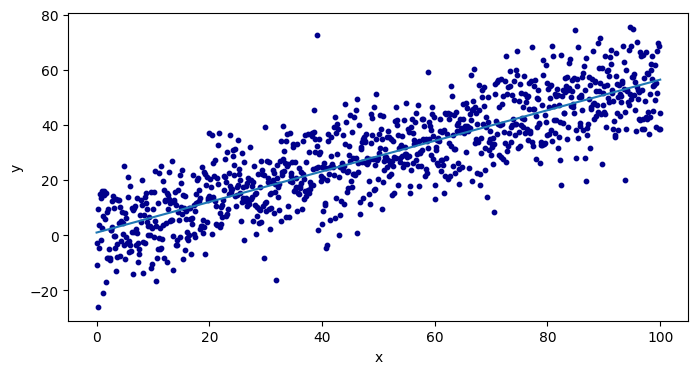

In [8]:
data = LinearData(b_0 = 1)


samples = 1000
b_1s = []
b_0s = []
LinearData.plot(data.x, data.y, data.b_0, data.b_1)
for i in range(samples):
    x, y = data.random_sample(100)
    ols = OLS(x, y)
    ols.fit()
    b_0s.append(ols.betas[0])
    b_1s.append(ols.betas[1])

    #LinearData.plot2(x, y, ols.betas[0], ols.betas[1], data.b_0, data.b_1)

assert np.isclose(np.mean(b_0s), data.b_0, atol = 0.1), "Error en la estimación de b_0"
assert np.isclose(np.mean(b_1s), data.b_1, atol = 0.1), "Error en la estimación de b_1"